# Projeto - Machine Learning I
#### `Professor`: Alex Lima

Este documento descreve os requisitos e critérios de avaliação para projeto de Machine Learning I.

A principal finalidade deste projeto é fazer com o aluno pratique a exploração e modelagem de dados apresentados ao longo do modelo de machine learning I. Assim, durante o planejamento e desenvolvimento de seu projeto, recomenda-se visitar a ementa do módulo e mapear em seu projeto os itens previstos e lecionados em aula.

**DESAFIO**: Seu desafio neste módulo é conhecer uma área de negócio ou ciência de seu interesse e propor uma solução por meio de um modelo de machine learning. A solução deve ser apresentada prlo grupo no último dia de aula e detalhada em um report (jupyter notebook). Como referência, a equipe pode seguir os passos descritos a seguir:
 - `Introdução`
     > Descreva a área e a solução proposta em seu projeto
 - `Coleta de dados`
     > Busque ou construa um dataset relacionado ao problema que deseja solucionar.
 - `Desenvolvimento`
     > Desenvolva um modelo de machine learning, utilizando o algoritmo de sua escolha. Inclua métricas e visualizações que tornem seu modelo atrativo e compreensível para que não é da área de dados.
 - `Apresentação`
     > A apresentação deve ocorrer no último dia de aula (29/04). A equipe terá até 20 minutos para apresentar sua solução.
  
### Bons estudos! Sucesso!


### Integrantes
 Jonatan Andres 

 Luiz Gustavo

 Anderson
 
 Júlio Malta

# Projeto de Classificação de frutas com Machine Learning.
Este projeto utiliza o algoritmo *K-Nearest Neighbors *(KNN)** para classificar diferentes tipos de frutas com base em suas dimensões (altura e largura). O projeto inclui a geração de um conjunto de dados de frutas a serem trabalhadas como exemplo, uma subsequente divisão desses dados em conjuntos de treinamento e teste, o treinamento em si de um modelo KNN, a previsão das classes das frutas no conjunto de teste e a avaliação do modelo.

#### Motivos para implementação desde projeto:

1. *Automação e eficiência*: Este projeto pode ser usado para automatizar o processo de logística de supermercados, armazéns ou fazendas, tornando o processo mais eficiente e reduzindo a necessidade de trabalho manual.

2. *Facilidade de integração*: O projeto é implementado em Python, uma linguagem de programação amplamente usada que é suportada por muitas plataformas e sistemas. Isso facilita a integração do projeto em sistemas existentes.

#### *KNN*: 
O algoritmo KNN é conhecido por sua precisão em problemas de classificação. Com o ajuste adequado dos parâmetros, este projeto pode fornecer uma classificação de frutas altamente precisa.

O algoritmo KNN, não se limita a apenas duas variáveis, ele pode funcionar com qualquer número de variáveis. Portanto, com a implementação do KNN, podemos ampliar o uso de variáveis, como textura e cor, para aumentar a precisão do algoritmo. É importante considerar a relevância dessas novas informações em relação à classificação das frutas. No entanto, o aumento de dimensões também traz consigo a transformação do espaço de características, tornando-o mais esparso. Esse fenômeno é conhecido como a “maldição da dimensionalidade”. Portanto, é essencial realizar uma análise da importância dos recursos para selecionar apenas aqueles que são úteis para o modelo em questão.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from typing import Dict
from time import time

<img src = "imagem1.webp" width="750" height="500">

<img src = "imagem2.webp" width="750" height="500">

### Criando Dataset

In [26]:
size = 100
# Dados de entrada sobre as frutas para a geração dos dados aleatórios.
inputs = [{'Class':     'Banana', 'Mean_height': 18, 'Std_height':   3, 'Mean_width':  5, 'Std_width':   1},
          {'Class':      'Apple', 'Mean_height': 10, 'Std_height': 1.5, 'Mean_width': 12, 'Std_width': 1.5},
          {'Class':      'Lemon', 'Mean_height':  5, 'Std_height':   1, 'Mean_width':  5, 'Std_width':   1},
          {'Class': 'Watermelon', 'Mean_height': 20, 'Std_height': 2.5, 'Mean_width': 25, 'Std_width':   3},
          {'Class':     'Papaya', 'Mean_height': 28, 'Std_height':   3, 'Mean_width': 15, 'Std_width':   2},
          {'Class':      'Mango', 'Mean_height': 17, 'Std_height': 1.5, 'Mean_width': 12, 'Std_width': 1.5},
          {'Class': 'Strawberry', 'Mean_height':  4, 'Std_height': 0.5, 'Mean_width':  2, 'Std_width': 0.5},
          {'Class':      'Grape', 'Mean_height':  2, 'Std_height': 0.5, 'Mean_width':  2, 'Std_width': 0.5}]

heights = np.array([])
widths = np.array([])
classes = []
# Para cada entrada, acessa a média e o desvio padrão da altura e largura de cada
# fruta e gera uma amostra com base da distribuição normal desses dados.
for input_i in inputs:
  loc_h   = input_i['Mean_height']
  scale_h = input_i['Std_height']
  height = np.random.normal(loc=loc_h, scale=scale_h, size=size)
  heights = np.concatenate([heights, height])

  loc_w   = input_i['Mean_width']
  scale_w = input_i['Std_width']
  width  = np.random.normal(loc=loc_w, scale=scale_w, size=size)
  widths = np.concatenate([widths, width])

  classes += [input_i['Class']] * size


# Criando um DataFrame com os dados
df = pd.DataFrame({
    'Width': widths,
    'Height': heights,
    'Class': classes
})

df

,Width,Height,Class
0,6.029156,14.963687,Banana
1,5.472597,13.035430,Banana
2,5.256030,20.469512,Banana
3,5.982691,18.219954,Banana
4,6.665474,14.130117,Banana
...,...,...,...
795,2.503757,2.359093,Grape
796,1.657685,2.219238,Grape
797,2.395313,2.009808,Grape
798,1.014948,2.336431,Grape


In [27]:
# Separação de Features e Target
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [29]:
# Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
# Treinando o modelo
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
y_pred = model_knn.predict(X_test)

In [39]:
# Calculando a acuracia do modelo a partir dos dados de teste
print("Acurácia teste: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))

Acurácia teste: 98.75%


In [40]:
print("Acurácia treino: %.2f%%" % (accuracy_score(y_train, model_knn.predict(X_train) ) * 100.0))

Acurácia treino: 99.64%


In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       0.96      1.00      0.98        27
      Banana       1.00      1.00      1.00        35
       Grape       0.97      0.97      0.97        32
       Lemon       1.00      1.00      1.00        29
       Mango       1.00      0.97      0.98        30
      Papaya       1.00      1.00      1.00        21
  Strawberry       0.97      0.97      0.97        32
  Watermelon       1.00      1.00      1.00        34

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240



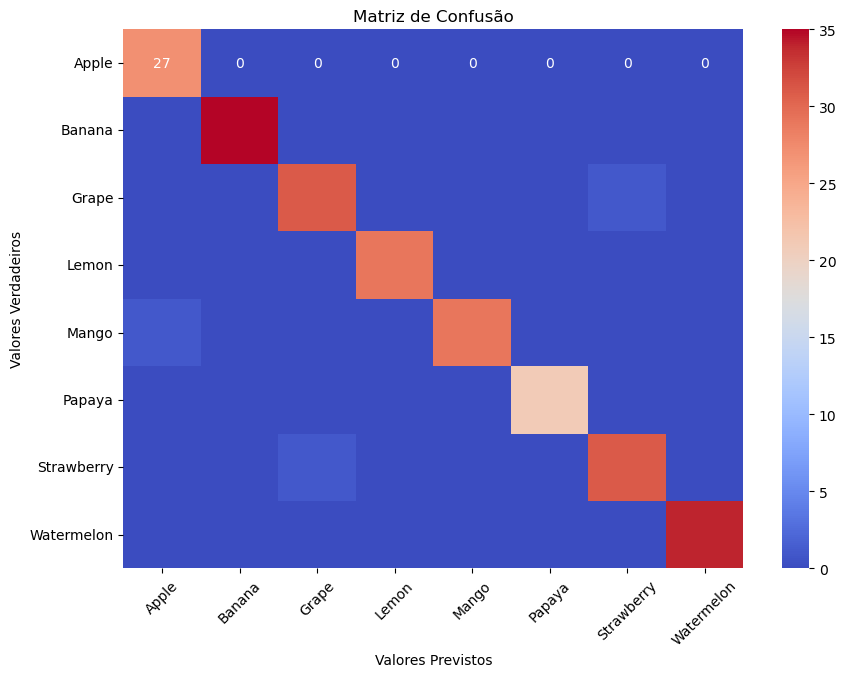

In [43]:
# Matriz de confusão 

labels = ['Apple', 'Banana', 'Grape', 'Lemon', 'Mango', 'Papaya', 'Strawberry', 'Watermelon'  ]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='coolwarm')

ticks_positions = [(i + 0.5) for i in range(len(labels))]

plt.xticks(ticks=ticks_positions, labels=labels, rotation=45, ha='center')
plt.yticks(ticks=ticks_positions, labels=labels, rotation=0, va='center')

plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

### **Validação Cruzada**

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [45]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [46]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=3)
resultado = cross_val_score(modelo, X, y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 98.50%


### Implemetação algoritmo KNN


In [47]:
class KNN:
  def __init__(self, data: pd.DataFrame):
    self.data = data


  def predict(self, p: Dict, k: int = 0) -> str:
    """
    Define a classe de um ponto com base nos k vizinhos mais próximos.
    Sendo a classe do ponto a classe predominante na vizinhança.
    """
    if k <= 0:
      k = int(sqrt(self.data.shape[0]))

    x = p['Width']
    y = p['Height']

    dists = list()
    # Calcula as distâncias de cada ponto
    for index in range(self.data.shape[0]):
      xi = self.data.loc[index, 'Width']
      yi = self.data.loc[index, 'Height']
      dist = sqrt((x-xi)**2 + (y-yi)**2)
      # Guarda o índice e a distância para cada ponto
      dists.append((index, dist))
    # Ordena com base nas distâncias
    dists.sort(key=lambda x: x[1])
    # Guarda apenas os índices dos k vizinhos mais próximos
    indexes = [dist[0] for dist in dists[:k]]
    # Guarda as classes das linhas do DataFrame dos índices mais próximos
    neighbors = self.data['Class'].iloc[indexes].tolist()
    # Verifica a classe mais frequente. Em caso de mais de uma classe com frequência
    # máxima, a que tiver um elemento mais próximo será considerada. (A primeira a aparecer)
    max_count = 0
    max_class = ''
    for class_i in set(neighbors):
      count = neighbors.count(class_i)
      if count > max_count:
        max_count = count
        max_class = class_i
    # Retorna a classe mais frequente
    return max_class


  def test(self, test_values) -> float:
    tot_sucess = 0
    for idx in range(test_values.shape[0]):
      width = test_values['Width'].iloc[idx]
      height = test_values['Height'].iloc[idx]
      class_i = test_values['Class'].iloc[idx]
      predict_class = self.predict(p={'Width': width, 'Height': height})
      if class_i == predict_class:
        tot_sucess += 1

    return tot_sucess / test_values.shape[0]


  def show(self, colors_dict) -> None:

    # Obtém as cores de cada classe
    colors = self.data['Class'].map(colors_dict)

    # Gera o gráfico de dispersão
    plt.scatter(self.data['Width'], self.data['Height'], c=colors, s=30)

    plt.title('Altura e Largura de cada fruta')

    plt.xlabel('Width (cm)')
    plt.xlim(0, 40)
    plt.xticks(range(0, 40, 2))

    plt.ylabel('Height (cm)')
    plt.ylim(0, 40)
    plt.yticks(range(0, 40, 2))
    # Adiciona a legenda ao gráfico
    legend = []
    for class_i, color in colors_dict.items():
        legend.append(plt.Line2D([0], [0], marker='o', color='w', label=class_i,
                                 markersize=10, markerfacecolor=color))
    plt.legend(handles=legend)

    plt.show()

In [48]:

def split_train_test(data: pd.DataFrame, porc_train: float = 80):
  train = int(df.shape[0] * porc_train / 100)
  # Escolhe 640 valores aleatórios entre 0 e 800, sem repetição
  train_idx = np.random.choice(np.arange(df.shape[0]), size=train, replace=False)
  test_idx = [idx for idx in np.arange(df.shape[0]) if idx not in train_idx]

  return df.iloc[train_idx].reset_index(drop=True), \
         df.iloc[test_idx].reset_index(drop=True)

In [49]:
train, test = split_train_test(df)

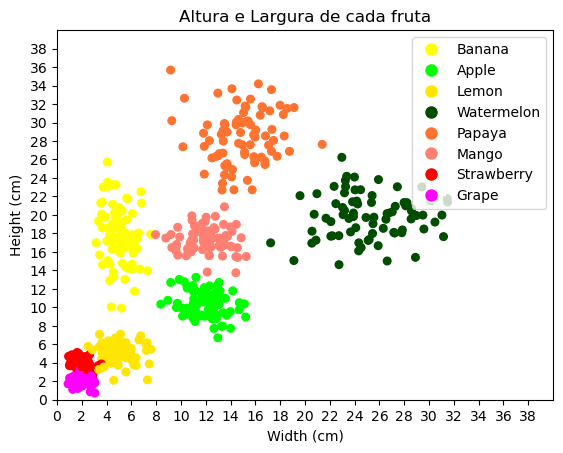

In [50]:
knn = KNN(train)

knn.show({'Banana':     (1,    1,    0),
          'Apple':      (0,    1,    0),
          'Lemon':      (1,  0.9,    0),
          'Watermelon': (0,  0.3,    0),
          'Papaya':     (1, 0.45, 0.19),
          'Mango':      (1,  0.5, 0.45),
          'Strawberry': (1,    0,    0),
          'Grape':      (1,    0,    1)})

In [51]:
inputs = [(3, 2), (6, 20), (2, 5), (6, 7), (30, 20), (15, 28), (14, 18), (12, 10)]
for width, height in inputs:
  pred_class = knn.predict(p={'Width': width, 'Height': height})
  print(f'Width: {width:3}, Height: {height:3}, predict: {pred_class}')


Width:   3, Height:   2, predict: Grape
Width:   6, Height:  20, predict: Banana
Width:   2, Height:   5, predict: Strawberry
Width:   6, Height:   7, predict: Lemon
Width:  30, Height:  20, predict: Watermelon
Width:  15, Height:  28, predict: Papaya
Width:  14, Height:  18, predict: Mango
Width:  12, Height:  10, predict: Apple


## Comparação entre os modelos


In [52]:

# Acurácia do modelo implementado
st = time()
acuracia_implementacao = knn.test(test)
exec_imp = time()-st

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = np.array(df[['Width', 'Height']])
y = np.array(df['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

st = time()
previsoes = knn.predict(X_test)

acuracia_sklearn = accuracy_score(y_test, previsoes)
exec_skl = time() - st

print('Acurácia do modelo implementado: ', acuracia_implementacao)
print(f'Tempo de execucão: {exec_imp} segundos.')
print()
print('Acurácia do modelo do SK-Learn: ', acuracia_sklearn)
print(f'Tempo de execucão: {exec_skl} segundos.')

Acurácia do modelo implementado:  0.99375
Tempo de execucão: 1.840895175933838 segundos.

Acurácia do modelo do SK-Learn:  0.98125
Tempo de execucão: 0.02773308753967285 segundos.
